In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from data_preprocessing import get_and_fix_data, X_path_train, Y_path_train, X_path_test, Y_path_test

In [2]:
X_train, Y_train, X_dev, Y_dev = get_and_fix_data(X_path_train, Y_path_train, .15)

In [3]:
X_train.shape

(6250, 561)

In [4]:
X_test, Y_test, _, _ = get_and_fix_data(X_path_test, Y_path_test, 0)

In [5]:
class LogisticGraph:
    """
    Implements a simple multiclass logistic regression model.
    """
    
    def __init__(self, num_features, num_categories):
        self.N = self.num_features = num_features
        self.C = self.num_categories = num_categories
        
        
    def _build_graph(self):
        self.X = tf.placeholder(tf.float32, [None, self.N])
        self.y = tf.placeholder(tf.float32, [None, self.C])
        
        self.W = tf.get_variable("W", shape=[self.C, self.N], dtype=tf.float32)
        

In [6]:
sess = tf.InteractiveSession()

In [7]:
W = tf.get_variable("W", shape=[561, 6], initializer=tf.truncated_normal_initializer)
b = tf.get_variable("b", shape=[6], initializer=tf.zeros_initializer)

X = tf.placeholder(tf.float32, [None, 561])
y = tf.placeholder(tf.float32, [None, 6])

z = tf.matmul(X, W) + b
y_hat = tf.nn.softmax(z)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z))

train = tf.train.AdamOptimizer().minimize(loss)

model = tf.global_variables_initializer()

In [8]:
losses = []
sess.run(model)
for _ in range(5000):
    _, cost = sess.run([train, loss], feed_dict={X: X_train, y: Y_train})
    losses.append(cost)
losses = np.array(losses)

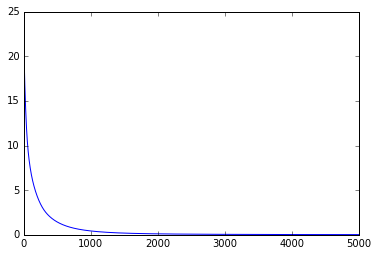

In [9]:
plt.plot(range(5000), losses)
plt.show()

In [10]:
losses[-1]

0.022101227

In [11]:
correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_hat, 1))

In [12]:
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [13]:
accuracy.eval(feed_dict={X: X_train, y: Y_train})

0.99264002

In [16]:
accuracy.eval(feed_dict={X: X_dev, y: Y_dev})

0.96733212

In [15]:
accuracy.eval(feed_dict={X: X_test, y: Y_test})

0.93009841

# To do:

0. Get some fun metrics on train, dev and test set
0. Fix everything into OOP